In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pyautogui

In [26]:
x_datas = []
y_datas = []
times = []

In [27]:
screen_width, screen_height = pyautogui.size()

In [28]:
with open("data.txt", "r") as file:
    for line in file:
        values = line.strip().split(',')

        x = float(values[0])
        y = float(screen_height) - float(values[1])
        time = float(values[2])

        x_datas.append(x)
        y_datas.append(y)
        times.append(time)

print("x : ", x_datas[:5])
print("y : ", y_datas[:5])
print("time : ", times[:5])


x :  [1035.28515625, 1153.4453125, 487.171875, 1105.77734375, 649.3515625]
y :  [789.12890625, 761.90234375, 548.453125, 779.15625, 430.5625]
time :  [87.57, 87.878, 100.647, 101.623, 102.547]


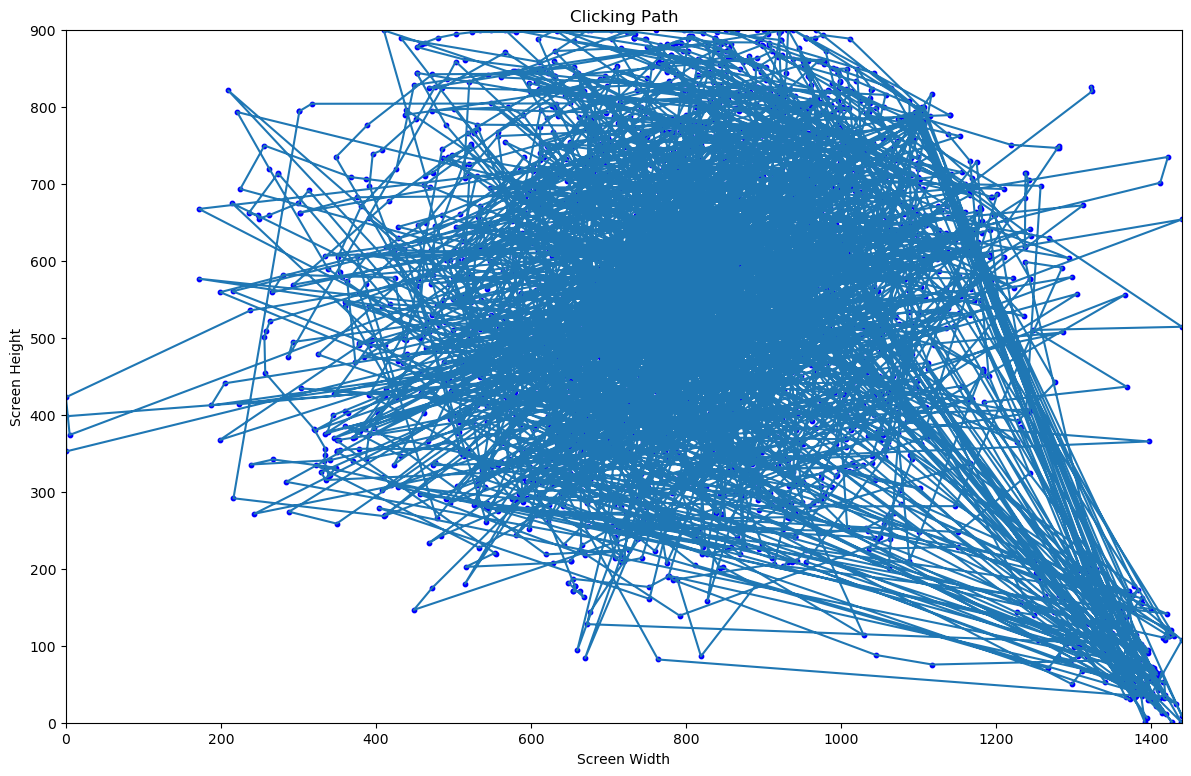

In [29]:
plt.figure(figsize=(screen_width/100, screen_height/100))
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Clicking Path')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)

plt.scatter(x_datas, y_datas, marker='o', color='blue', s=10)
plt.plot(x_datas, y_datas)
plt.show()

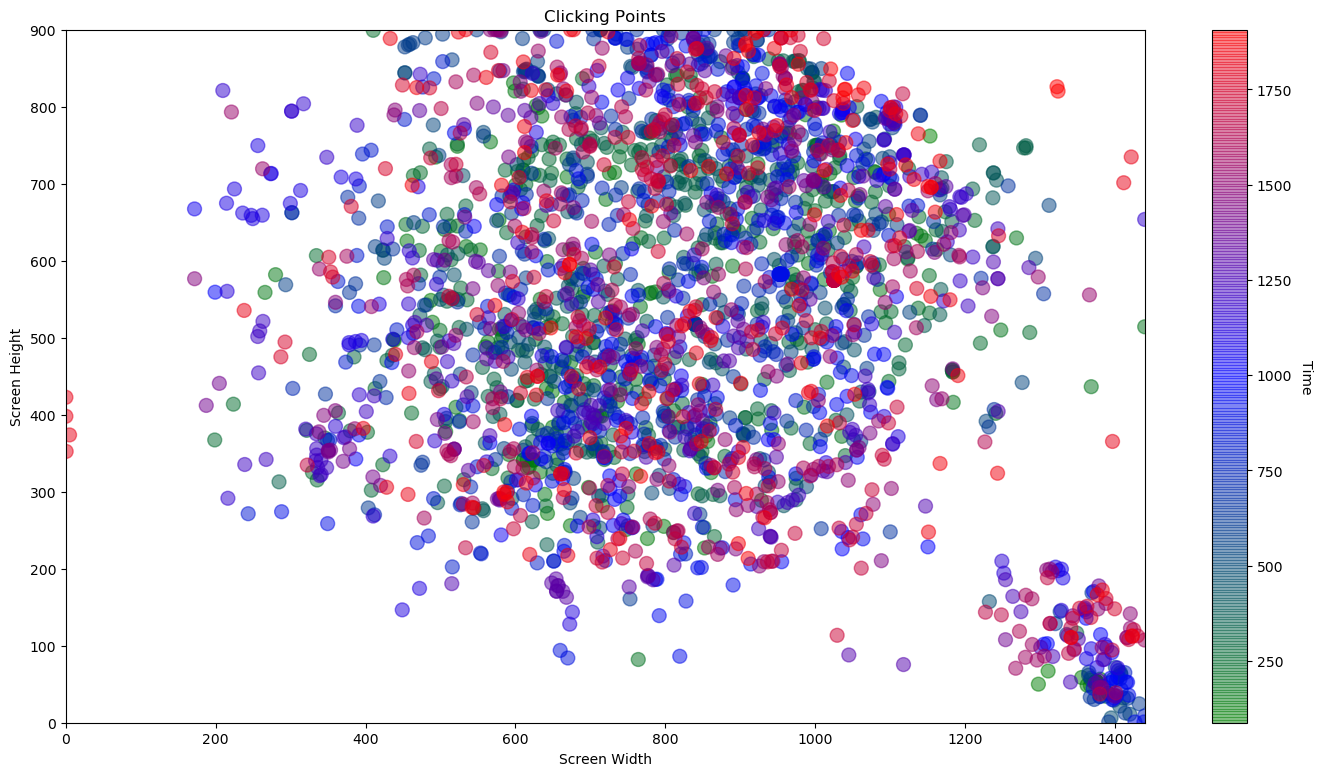

In [42]:
colorbar_size = 300
plt.figure(figsize=((screen_width+colorbar_size)/100, screen_height/100))
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Clicking Points')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)

cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [(0, 'green'), (0.5, 'blue'), (1, 'red')])

norm = plt.Normalize(min(times), max(times))

plt.scatter(x_datas, y_datas, c=times, cmap=cmap, s=100, norm=norm, alpha=0.5)
colorbar = plt.colorbar()
colorbar.set_label('Time', rotation=270, labelpad=15)
plt.show()

In [31]:
green_dots_x = []
green_dots_y = []
condition1 = 0
condition2 = max(times) * (1/3)
for i in range(len(times)):
    if(condition1 <= times[i] < condition2):
        green_dots_x.append(x_datas[i])
        green_dots_y.append(y_datas[i])

blue_dots_x = []
blue_dots_y = []
condition1 = max(times) * (1/3)
condition2 = max(times) * (2/3)
for i in range(len(times)):
    if(condition1 <= times[i] < condition2):
        blue_dots_x.append(x_datas[i])
        blue_dots_y.append(y_datas[i])

red_dots_x = []
red_dots_y = []
condition1 = max(times) * (2/3)
condition2 = max(times)
for i in range(len(times)):
    if(condition1 <= times[i] <= condition2):
        red_dots_x.append(x_datas[i])
        red_dots_y.append(y_datas[i])

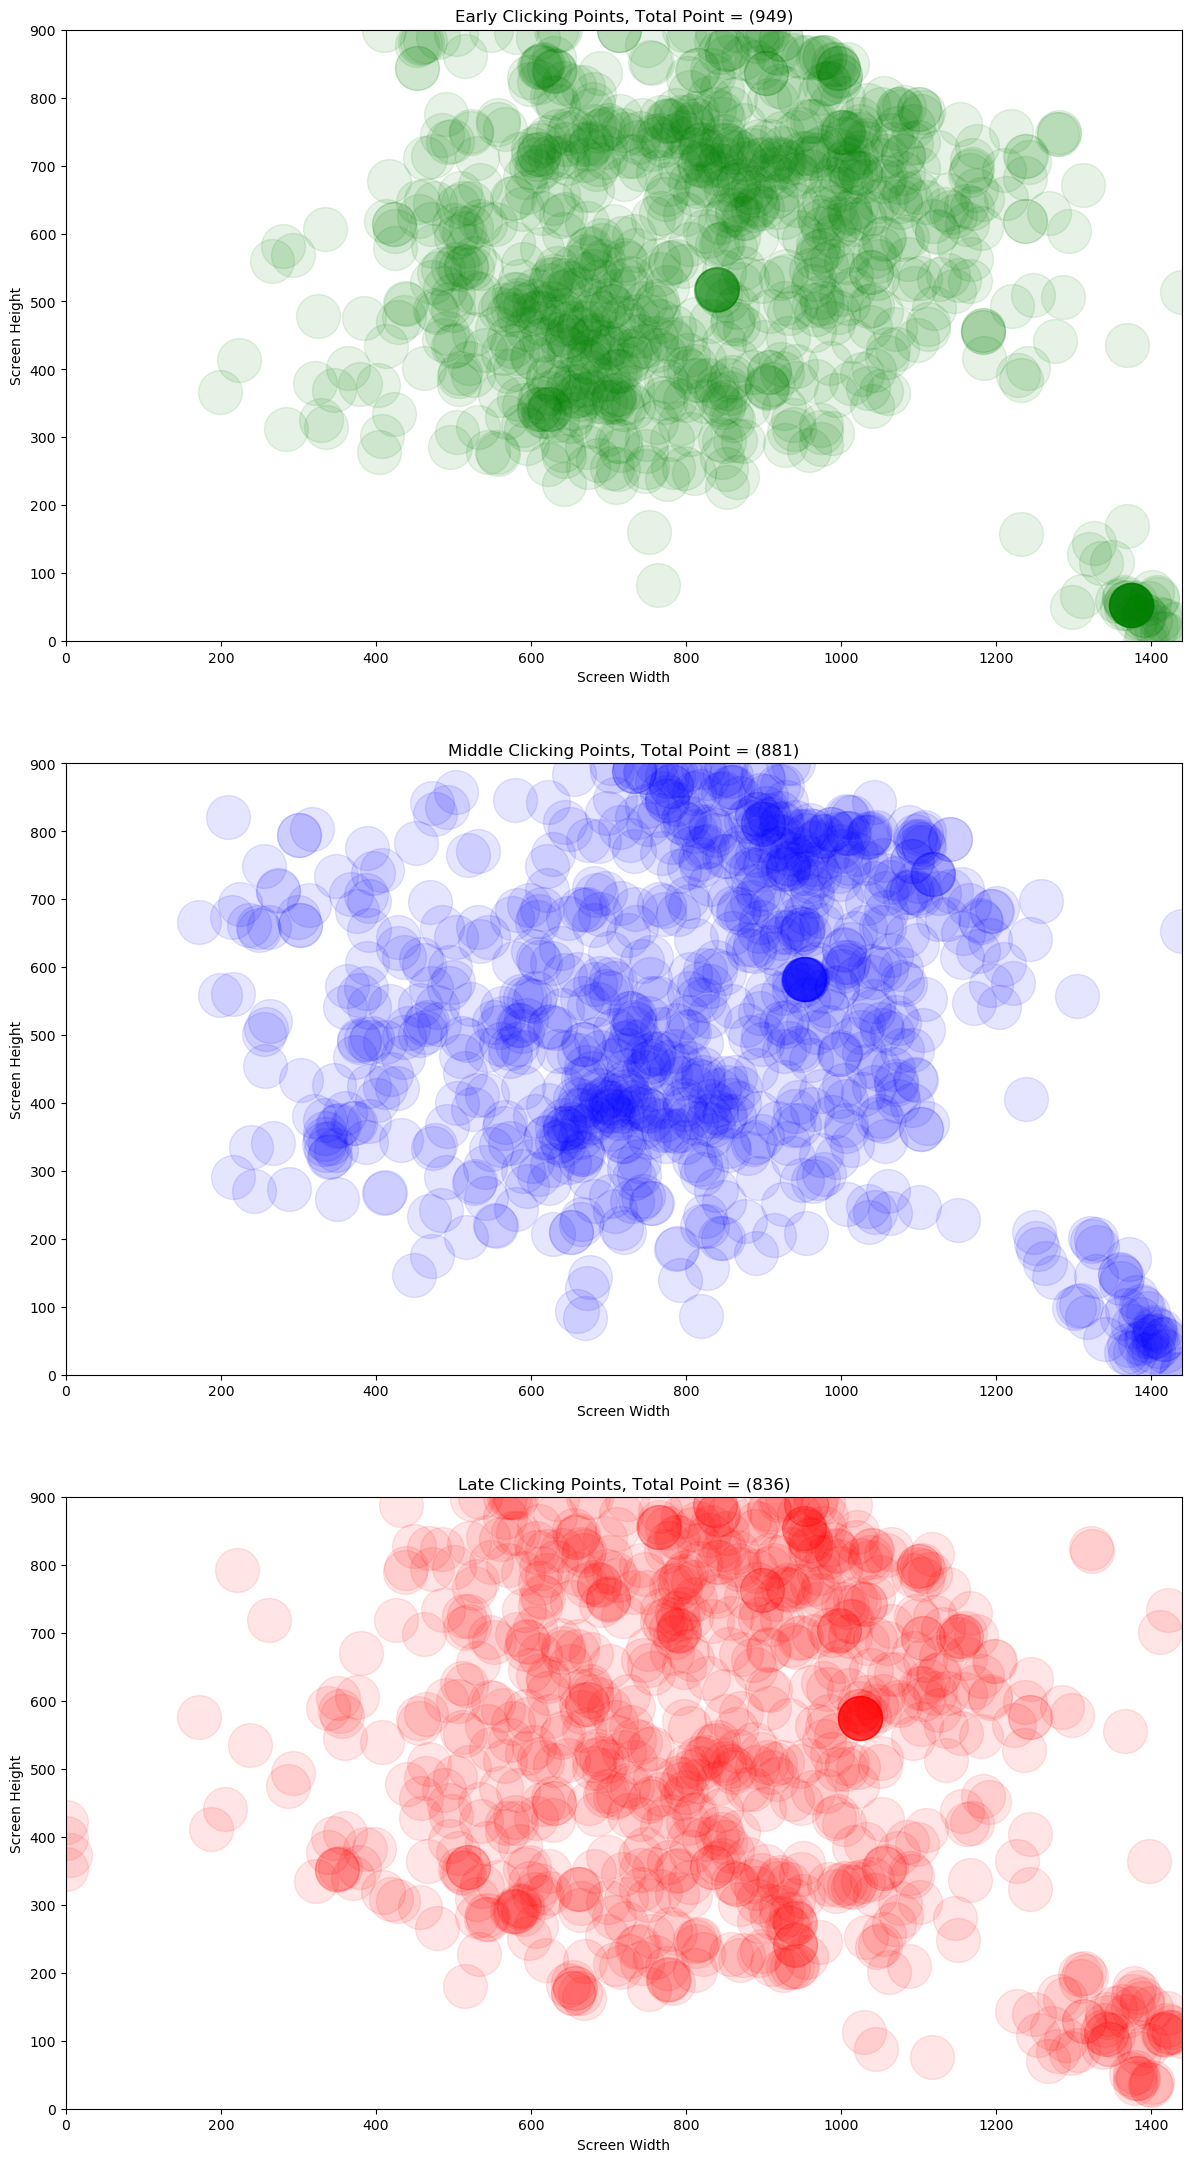

In [36]:
plt.figure(figsize=((screen_width)/100, 3*screen_height/100))

plt.subplot(3,1,1)
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title(f'Early Clicking Points, Total Point = ({len(green_dots_x)})')
plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.scatter(green_dots_x, green_dots_y, color="green", s=1000, alpha=0.1)

plt.subplot(3,1,2)
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title(f'Middle Clicking Points, Total Point = ({len(blue_dots_x)})')
plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.scatter(blue_dots_x, blue_dots_y, color="blue", s=1000, alpha=0.1)

plt.subplot(3,1,3)
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title(f'Late Clicking Points, Total Point = ({len(red_dots_x)})')
plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.scatter(red_dots_x, red_dots_y, color="red", s=1000, alpha=0.1)
plt.show()